In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

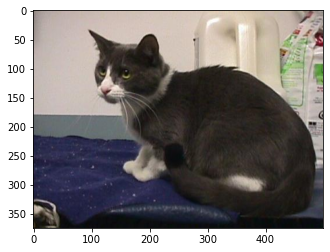

In [2]:
cat4=cv2.imread('../CATS_DOGS/train/CAT/4.jpg')
cat4=cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)
plt.imshow(cat4)

In [3]:
cat4.shape

(375, 500, 3)

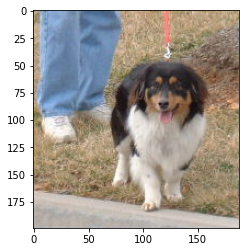

In [4]:
dog=cv2.imread('../CATS_DOGS/train/DOG/2.jpg')
dog=cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)
plt.imshow(dog)

In [5]:
dog.shape

(199, 188, 3)

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
image_gen=ImageDataGenerator(rotation_range=30,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            rescale=1/255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest'
                            )

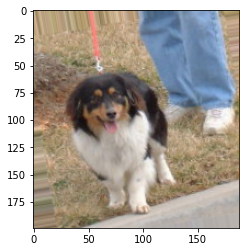

In [8]:
plt.imshow(image_gen.random_transform(dog))

In [9]:
image_gen.flow_from_directory('../CATS_DOGS/train/')

Found 18743 images belonging to 2 classes.


In [10]:
input_shape=(150,150,3)

In [11]:
from keras.models import Sequential

In [12]:
from keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D

In [13]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
batch_size=16

train_image_gen=image_gen.flow_from_directory('../CATS_DOGS/train/',target_size=input_shape[:2],
                                             batch_size=batch_size,class_mode='binary')

Found 18743 images belonging to 2 classes.


In [15]:
test_image_gen=image_gen.flow_from_directory('../CATS_DOGS/test/',target_size=input_shape[:2],
                                             batch_size=batch_size,class_mode='binary')

Found 6251 images belonging to 2 classes.


In [16]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
results=model.fit(train_image_gen,epochs=100,steps_per_epoch=150,
                           validation_data=test_image_gen,validation_steps=12)

Epoch 1/100
150/150 [==============================] - 12s 79ms/step - loss: 0.7076 - accuracy: 0.5199 - val_loss: 0.7148 - val_accuracy: 0.4688
Epoch 2/100
150/150 [==============================] - 12s 81ms/step - loss: 0.6869 - accuracy: 0.5486 - val_loss: 0.6597 - val_accuracy: 0.5469
Epoch 3/100
150/150 [==============================] - 12s 77ms/step - loss: 0.6770 - accuracy: 0.5670 - val_loss: 0.6678 - val_accuracy: 0.5885
Epoch 4/100
150/150 [==============================] - 11s 76ms/step - loss: 0.6808 - accuracy: 0.5745 - val_loss: 0.6915 - val_accuracy: 0.4896
Epoch 5/100
150/150 [==============================] - 11s 76ms/step - loss: 0.6909 - accuracy: 0.5603 - val_loss: 0.6862 - val_accuracy: 0.5677
Epoch 6/100
150/150 [==============================] - 11s 76ms/step - loss: 0.6836 - accuracy: 0.5581 - val_loss: 0.7089 - val_accuracy: 0.5469
Epoch 7/100
150/150 [==============================] - 12s 76ms/step - loss: 1.2127 - accuracy: 0.5234 - val_loss: 0.6972 - val_ac

150/150 [==============================] - 12s 77ms/step - loss: 0.5406 - accuracy: 0.7503 - val_loss: 0.5070 - val_accuracy: 0.7708
Epoch 58/100
150/150 [==============================] - 11s 76ms/step - loss: 0.5156 - accuracy: 0.7610 - val_loss: 0.4749 - val_accuracy: 0.7708
Epoch 59/100
150/150 [==============================] - 12s 77ms/step - loss: 0.4773 - accuracy: 0.7931 - val_loss: 0.4227 - val_accuracy: 0.8281
Epoch 60/100
150/150 [==============================] - 11s 76ms/step - loss: 0.5246 - accuracy: 0.7583 - val_loss: 0.4967 - val_accuracy: 0.7500
Epoch 61/100
150/150 [==============================] - 12s 77ms/step - loss: 0.4913 - accuracy: 0.7703 - val_loss: 0.5192 - val_accuracy: 0.7552
Epoch 62/100
150/150 [==============================] - 11s 76ms/step - loss: 0.4886 - accuracy: 0.7723 - val_loss: 0.6439 - val_accuracy: 0.6875
Epoch 63/100
150/150 [==============================] - 11s 76ms/step - loss: 0.5067 - accuracy: 0.7638 - val_loss: 0.4814 - val_accuracy

In [19]:
results.history['accuracy']

[0.5166666507720947,
 0.5579166412353516,
 0.5741666555404663,
 0.5712500214576721,
 0.5587499737739563,
 0.559166669845581,
 0.5495833158493042,
 0.5879166722297668,
 0.6016666889190674,
 0.6208333373069763,
 0.5989125967025757,
 0.6474999785423279,
 0.6641666889190674,
 0.6566666960716248,
 0.6537500023841858,
 0.659166693687439,
 0.6691666841506958,
 0.6875,
 0.6829166412353516,
 0.6746131181716919,
 0.6804166436195374,
 0.6920833587646484,
 0.7054166793823242,
 0.7176913619041443,
 0.7066666483879089,
 0.7112500071525574,
 0.7004166841506958,
 0.6970833539962769,
 0.706250011920929,
 0.71875,
 0.6987500190734863,
 0.7400000095367432,
 0.7337499856948853,
 0.7254166603088379,
 0.7333333492279053,
 0.7183333039283752,
 0.7354166507720947,
 0.7283333539962769,
 0.7354166507720947,
 0.7554166913032532,
 0.7458333373069763,
 0.7300000190734863,
 0.7437499761581421,
 0.7516666650772095,
 0.7574999928474426,
 0.75,
 0.7172731161117554,
 0.7511501312255859,
 0.7587500214576721,
 0.75875002

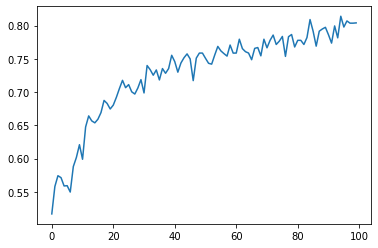

In [20]:
plt.plot(results.history['accuracy'])

In [38]:
dog_file='../CATS_DOGS/test/DOG/10005.jpg'

In [39]:
from keras.preprocessing import image

In [40]:
dog_img=image.load_img(dog_file,target_size=(150,150))

In [41]:
dog_image=image.img_to_array(dog_img)

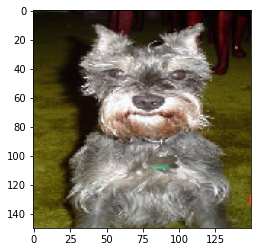

In [42]:
plt.imshow(dog_img)

In [43]:
dog_image.shape

(150, 150, 3)

In [44]:
import numpy as np

In [45]:
dog_img=np.expand_dims(dog_img,axis=0)

In [46]:
dog_img.shape

(1, 150, 150, 3)

In [47]:
dog_img=dog_img/255

In [48]:
model.predict_classes(dog_img)

array([[1]], dtype=int32)

In [49]:
model.predict(dog_img)

array([[0.93183887]], dtype=float32)